# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [2]:
news = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')     # loads the dataset into a data-frame
news_raw = pd.read_csv(news)                                       # reads the data-frame
news_raw.info()                                                    # basic information about variables
news_raw.describe()                                                # displays summary statistics for the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


The key features of this dataset includes, it analyses 520 words. The dataset also uses 8.5 MB  and is of type int64. Looking at the summary statistics we see that the count is 2129 which means that there are 2129 entries. By looking at the standard deviation of the classess we see that it is 1.40 (rounded to 1dp), which is a low standard deviation, this ulimatley suggests that there isn't an even distrubtion of classes.

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [3]:
news_raw.T.head(10)                                               # display names of a few attributes

,0,1,2,3,4,5,6,7,8,9,...,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256
w1_aaa,1,1,1,1,1,1,1,1,1,1,...,1,506,1,1,1,1,1,1,1,1
w2_pins,1,1,1,1,1,1,1,1,1,1,...,1,124,1,1,1,1,1,1,1,1
w3_kmr,1,1,1,1,1,1,1,1,1,1,...,1,381,1,1,1,1,1,1,1,1
w4_notion,1,1,1,1,1,1,1,1,1,1,...,1,290,1,1,1,1,1,1,1,1
w5_queens,1,1,1,1,1,1,2,1,1,1,...,1,298,1,1,1,1,1,1,1,1
w6_dwyer,1,1,1,1,1,1,1,1,1,1,...,1,167,1,1,1,1,1,1,1,1
w7_defenseman,1,1,1,1,1,1,1,1,1,1,...,1,399,1,1,3,1,1,1,1,1
w8_gld,1,1,1,1,1,1,1,1,1,1,...,1,525,1,1,1,1,1,1,1,1
w9_tocchet,1,1,1,1,1,1,1,1,1,1,...,1,184,1,1,1,1,1,1,1,1
w10_home,1,1,2,1,1,1,1,1,1,1,...,1,201,1,1,1,1,1,1,2,1


From the output, I can see that there are 10 documents we are analysing. As the table is transposed, the rows represent words and each entry is the freqeuncy the word appears in the document.

The words here selected are where you can see a correlation to a class quite quickly.

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset **A**. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 

1. [Text] Mention anything peculiar you observe in the Data.

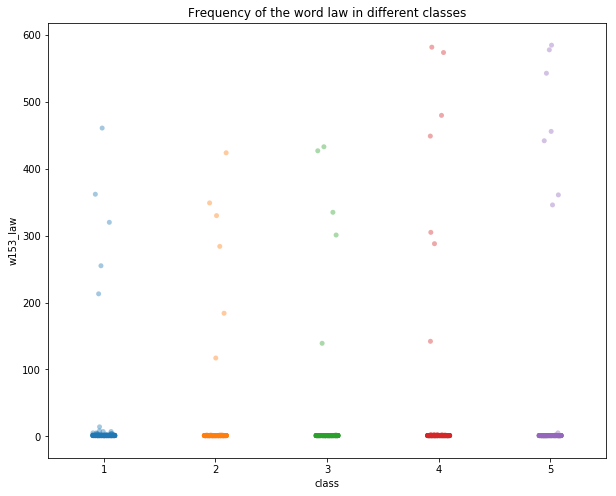

In [4]:
# x axis is class, y axis is word 
plt.subplots(figsize=(10,8))

# create a strip plot
sns.stripplot(x='class',y='w153_law', data=news_raw, jitter=True, alpha=0.4)

# title for graph
plt.title('Frequency of the word law in different classes')                           
plt.show()

(2)

Observing the graph, we see the likely word frequency is one in the documents, this could mean that the word does not occur in the document. However I can also see that they may be some outliers above 100. As depending on the word count in each document, I think it is unlikley that there would be 600 word frequency in a document. This suggests that there are outliers.


### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

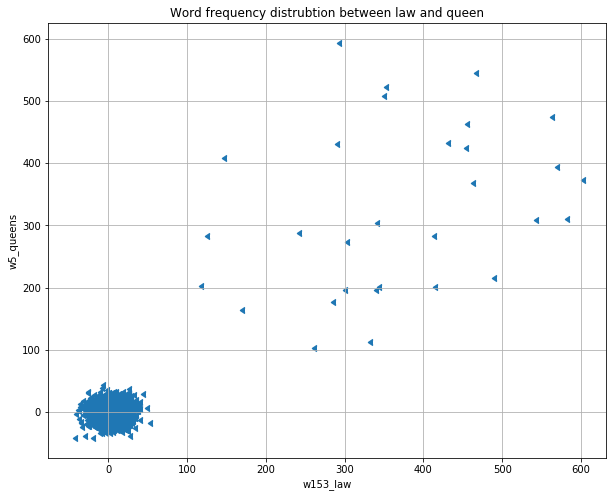

In [5]:
plt.subplots(figsize=(10,8))

# plot the scatter plot
scatter_jitter(news_raw['w153_law'],news_raw['w5_queens'], jitter = 0.3)          

# set the labels and title
plt.xlabel('w153_law')                                                            
plt.ylabel('w5_queens')                                                           
plt.title('Word frequency distrubtion between law and queen')
plt.grid()

plt.show()

I think these plots increase the possibility of us visualising the data to see outliers. As shown above we can see the majority of the points are in the left corner of the plot, as of this I would consider the rest of the points to be outliers. I think they are outliers as I would not think queens are law are closely related or likely to be in a document together.

I think a better way to visualise if outliers do exist would be a box plot as you can see the spread of data a lot easier from the min value and the max value of each word as the higher the spread, the more likely the data contains outliers.

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of points in the cleaned dataset, and the number rejected as outliers and comment on the result

We first assume a normal disturbtion. I think this is reasonable as there are going to be a few words which have have a similar occurence while there are also going to be words which have a very high frequency and low frequency. I decided to assume a normal disturbtion as I first tried to find outliers using interquartile range, however this is not a viable soloution due to most of interquartile range of words being zero.

Assuming a normal distrubtion and taking three standard deviations we can then assume that approximatley 99.7% of the data lies within this range. This then means any extreme values will be considered outliers.

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,5.0,3.0,6.0,8.0,4.0,6.0,4.0,8.0,4
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,3.0,6.0,8.0,3.0,4.0,5.0,6.0,5.0,4
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,4.0,2.0,6.0,5.0,2.0,5.0,5.0,7.0,8.0,2
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,3.0,6.0,1.0,1.0,8.0,1.0,8.0,4.0,3
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,1.0,7.0,8.0,6.0,3.0,1.0,8.0,4.0,3
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,7.0,5.0,4.0,5.0,5.0,7.0,7.0,7.0,2.0,2
6,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,3.0,6.0,8.0,8.0,3.0,5.0,2.0,1.0,2.0,1
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,8.0,6.0,2.0,3.0,7.0,8.0,2.0,5.0,3
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.0,3.0,7.0,8.0,1.0,2.0,3.0,2.0,6.0,5
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,7.0,2.0,4.0,1.0,2.0,5.0,7.0,1.0,1


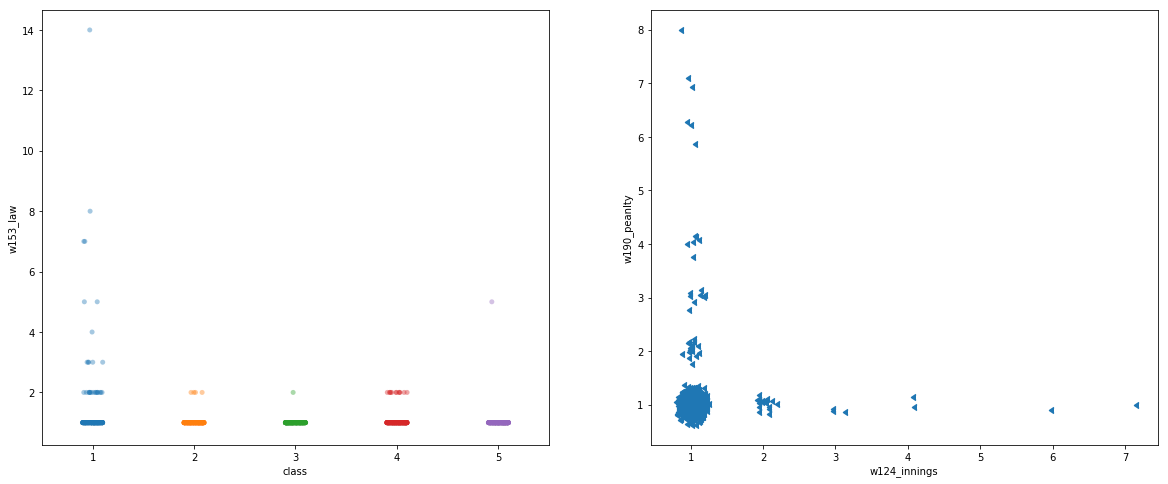

In [6]:

std = news_raw.describe().T['std']                                                              # gets the standard deviation of the words               
mean = news_raw.describe().T['mean']                                                            # gets the mean of the words of the words
three_std = 2* std                                                                              # calculates 3 standard deviations of the words 

mini = mean - three_std                                                                         # calculates the minimum value for threshold
maxi = mean + three_std                                                                         # calculates the maximum value for threshold

news_clean = news_raw[(mini < news_raw) & (news_raw < maxi)].dropna()                           # removes outliers and drops it 
display(news_clean.head(10))                                                                    # prints out news_clean



# visualising the word 'law'again, the graph shows a more realistic distrubution with less extreme values
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.stripplot(x='class',y='w153_law', data=news_clean, jitter=True, alpha=0.4, ax=ax[0])        # prints out class of law


# visualising correlation between two words, graphs shows no extreme values
scatter_jitter(news_clean['w124_innings'],news_clean['w190_penalty'], jitter = 0.3)             # plot the scatter plot
plt.xlabel('w124_innings')                                                                      # set the x axis 
plt.ylabel('w190_peanlty')                                                                      # set the y axis 
plt.show()


# --------------
# Attempt at trying IQR to find outliers 
# desc = news_raw.describe().T
# q_one = desc['25%']
# q_three = desc['75%']
# iqr = q_three - q_one
# iqr_range =iqr  * 1.5

# mini = q_one - iqr_range
# maxi = q_three + iqr_range

# news_clean = news_raw[(mini <= news_raw) & (news_raw <= maxi)].dropna()
# news_clean

- The number of documents before outliers is 2129.
- The number of documents before after outliers is 2094.

This means that there is a difference of 35 documents. There was one document which stood out for me, it was document 2248. Just by looking at the word frequency of words, I could clearly see it was an outlier.

# ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

In [7]:
# (1) # Your Code goes here:

(2) ***Your answer goes here:***

## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [8]:
news_train = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'train_20news.csv'))     # Load and read training data
news_test  = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'test_20news.csv'))      # Load and read test data

news_train.info()                                                                       # displays info of training data 

print("")  

news_test.info()                                                                        # displays info of training data
display(news_train.describe())                                                          # displays summary statistics 
display(news_test.describe())                                                           # displays summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.3 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 1910 to 2037
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 522.0 KB


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,...,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,1.025727,1.017627,1.014769,1.008576,1.006193,1.010481,1.026203,1.024297,1.012387,1.084326,...,4.574083,4.464983,4.533111,4.557885,4.531682,4.514531,4.509290,4.521201,4.412577,3.091472
std,0.280109,0.205208,0.172657,0.115206,0.078473,0.134174,0.618880,0.274219,0.153879,0.491139,...,2.283028,2.273922,2.329654,2.292246,2.333558,2.259005,2.287548,2.295995,2.296504,1.395628
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,6.500000,6.000000,4.000000
max,8.000000,7.000000,5.000000,4.000000,2.000000,4.000000,28.000000,5.000000,4.000000,16.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.007812,1.031250,1.0,1.0,1.007812,1.015625,1.007812,1.039062,1.015625,1.085938,...,4.757812,4.351562,4.593750,4.445312,4.53125,4.453125,4.687500,4.421875,4.531250,3.078125
std,0.088388,0.278847,0.0,0.0,0.088388,0.124507,0.088388,0.291678,0.124507,0.281373,...,2.201453,2.175706,2.438011,2.387001,2.31373,2.383868,2.390104,2.285212,2.370878,1.400840
min,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.75000,2.000000,2.750000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,3.000000
75%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,6.25000,7.000000,7.000000,6.000000,7.000000,4.000000
max,2.000000,4.000000,1.0,1.0,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000


### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

1) The assumption of using the Naive Bayes Model is independence of data features with each other within the class.

2) The main issue faced if this assumption is not made is computing the probabilities of the dependence on each other as this would mean the features have a non-zero covariance.

### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset A. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

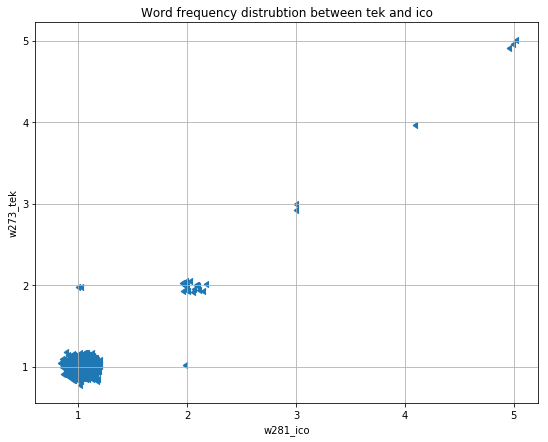

In [9]:
plt.subplots(figsize=(9,7))
scatter_jitter(news_clean['w281_ico'], news_clean['w273_tek'],jitter = 0.3)                 # plot the graph

plt.xlabel('w281_ico')                                                                      # set the x axis 
plt.ylabel('w273_tek')                                                                      # set the y axis 

plt.title('Word frequency distrubtion between tek and ico')    
plt.grid()
plt.show()

- From the graph above, there is a positive correlation between the words 'tek' and 'ico'

- I think this impacts the validity of the Naive Bayes assumption as there is a strong correlation between the two words. It looks as if 'tek' is there, then 'ico' is also likely to appear. However just because there is an correlation does not imply the two words are independent from each other.

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

The simplest classiffier is random selection. As there are 5 classifiers which we can assume to be evenly distrubuted such as a uniform distbution,then there is a 20% chance of having a class. If Naive Bayes accuracy rate is higher than 20 % then we can assume that the classification has a better performance.

In [10]:
from sklearn.dummy import DummyClassifier                                                     # import DummyClassifier
             
dummy_classifier = sklearn.dummy.DummyClassifier(strategy='most_frequent')                    # using method of most frequent

dummy_classifier.fit(news_train.loc[:, news_train.columns != 'class'], news_train['class'])   # fit the model of the training data

predict = dummy_classifier.predict(news_train.loc[:, news_train.columns != 'class'])          # predict labels for training data
acc = accuracy_score(news_train['class'],predict)                                             # calculate the accuracy score

print('Dummy Classifier has %0.2f%% accuracy rate.'% (acc*100))                               # displays accuracy

Dummy Classifier has 21.30% accuracy rate.


<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [11]:
g_classifier = GaussianNB()                                                                # create a classifier

g_classifier.fit(news_train.loc[:, news_train.columns != 'class'], news_train['class'])    # fit the training data

GaussianNB(priors=None)

GaussianNB has 87.80% accuracy rate on training data.


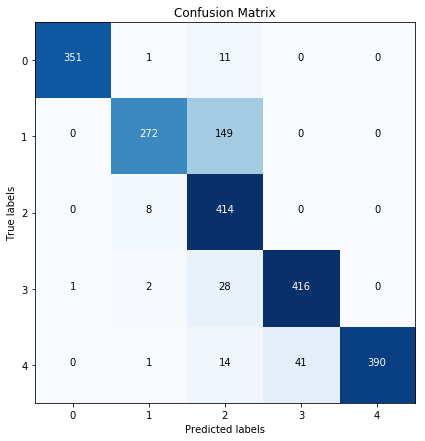

In [12]:
import itertools

predict = g_classifier.predict(news_train.loc[:, news_train.columns != 'class'])     # predict the test data

accuracy = accuracy_score(news_train['class'],predict)                               # calculates accuracy of Gaussian
print('GaussianNB has %0.2f%% accuracy rate on training data.'% (accuracy*100))      # displays accuracy

cm = confusion_matrix(news_train['class'],predict)                                   # creates a confusion matrix

plt.figure(figsize = (7,7))

#--- gives the values in the matrix
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
plt.imshow(cm, cmap = 'Blues')                                                       # plot the confusion matrix
plt.ylabel('True labels')                                                            # set the x axis 
plt.xlabel('Predicted labels')                                                       # set the y axis
plt.title('Confusion Matrix')
plt.show()

The accuracy from the Gaussian classifier is approximatley 87% which is a high accuracy rate. I think the accuracy is a reasonable metric to use for this dataset as, this is predicting the class of the document, so either it could be the right classification or not as there are only 5 options it could be.

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

The confusion matrix shows high accuracy which is what I would have expected considering it is accuracy rate of 87%. There does seem to be quite a few documents (value =149) which have a true label as 2 but was predicted as 3 which is quite intresting as it shows how both classes are quite similar.

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with the training data/baseline.

GaussianNB has 82.03% accuracy rate on test data.


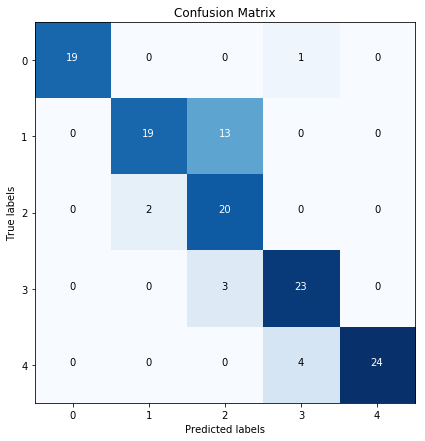

In [13]:
predict_test = g_classifier.predict(news_test.loc[:, news_test.columns != 'class'])

accuracy = accuracy_score(news_test['class'],predict_test)                               # calculates accuracy of Gaussian
print('GaussianNB has %0.2f%% accuracy rate on test data.'% (accuracy*100))                                                                    # displays accuracy


cm = confusion_matrix(news_test['class'],predict_test)                                   # creates a confusion matrix
plt.figure(figsize = (7,7))

#--- gives the values in the matrix
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.imshow(cm, cmap = 'Blues')                                                            # plot the confusion matrix
plt.ylabel('True labels')                                                                 # set the x axis 
plt.xlabel('Predicted labels')                                                            # set the y axis
plt.title('Confusion Matrix')
plt.show()

In [14]:
predict_dummy = dummy_classifier.predict(news_test.loc[:, news_test.columns != 'class'])  # predict labels for training data

acc_test = accuracy_score(news_test['class'],predict_dummy)                               # calculate the accuracy score

print('Dummy classifier has %0.2f%% accuracy rate on test data.'% (acc_test*100))         # displays accuracy

Dummy classifier has 20.31% accuracy rate on test data.


(3)

- Baseline Results :
 - The baseline classifier had an accuracy rate of 21.3% for the training data while for the test data it had an accuracy rate of 20.3%. This here shows that the baseline was more accurate at classifying the training data than the test data.
- Gaussian Results :
 - The Gaussian classifier had an accuracy rate of 87.8% for the training data while for the test data it had an accuracy rate of 82%. This shows that the Gaussian classifier was more accurate at classifying the training data than the test data.

Overall the Gaussian classifier is more accurate than the baseline classifier which is as expected. I think something that surprised me is the fact that the training data had a higher accuracy in both classifiers than the test data, I think the reason is because we end up using the training data as the fit which means it would be more accurate for the training data than the test data.



### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

In [15]:
# (1) # Your Code goes here:

(2) ***Your answer goes here:***

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***